# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

**Users:** city (469 - 11%), churn_date (3,534 - 88%)

**Usage:** date (50 - 0.1%), duration (22,076 - 55%), length (17,896 - 44%)
  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Users:**
  
  city (11%) - Imputar con "Unknown" por ser un porcentaje manejable
  
  churn_date (88%) - Ignorar porque representan usuarios que NO han abandonado el servicio

**Usage:**
  

  date (0.1%) - Marcar como NA las fechas fuera de rango
  
  duration (55%) - Ignorar, ya que los mensajes de texto tienen duración nula
  
  length (44%) - Ignorar, ya que las llamadas tienen longitud de texto nulo


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:

# explorar columnas numéricas de users
columnas = ["user_id", "age"]

for col in columnas:
    print(col,"→", users[col].isin([-999, 999]).sum())



user_id → 0
age → 55


- La columna `user_id` no tiene sentinels.
- La columna `age` tiene 55 sentinels encontrados

In [13]:
# explorar columnas numéricas de usage
columnas = ["id", "user_id"]

for col in columnas:
    print(col,"→", usage[col].isin([-999, 999]).sum())

id → 1
user_id → 0


- Las columnas `id` tiene 1 sentinel encontrado, mientras `user_id` no tiene sentinels.
- Las columnas ...

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(col,"→", users[col].isin(["?"]).sum())


city → 96
plan → 0


- La columna `city` tiene 96 sentinels encontrados
- La columna `plan` no tiene sentinels

In [15]:
# explorar columna categórica de usage
print(col,"→", usage['type'].isin(["?"]).sum())

plan → 0


- La columna `type` no tiene sentinels encontrados


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?

Se encontraron valores inválidos o sentinels en:

Users: age, city

Usage: id
  
- ¿Qué acción tomarías?

1.- Usamos columnas nuevas (..._flags)  para conservar la información original sobre qué valores estaban ausentes

2.- Para "age" imputamos con la mediana, para "city" y "id" imputamos con "unknown"


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users["reg_date"], errors="coerce")

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage["date"], errors="coerce")

In [18]:
# Revisar los años presentes en `reg_date` de users
users["reg_date"].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, se encontraron 40 fechas incorrectas (años posteriores a 2024).

In [19]:
# Revisar los años presentes en `date` de usage
usage["date"].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, todas las fechas son del 2024.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)

En la tabla de users, la columna reg_date tiene 40 fechas del 2026 (posteriores a la fecha del reporte)


- ¿Qué harías con ellas?

Podrían marcarse como datos problemáticos o eliminarse por tratarse de un porcentaje muy pequeño del dataset

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:

# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", "NA")

# Verificar cambios
users['city'].describe()


count       3531
unique         7
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year >= 2026, 'reg_date'] = pd.NaT

# Verificar cambios
print(users['reg_date'].dtype)
print(users['reg_date'].value_counts())
print(f"Valores nulos: {users['reg_date'].isnull().sum()}")

datetime64[ns]
2024-06-27 06:08:22.325581392    1
2023-03-31 06:21:20.120030008    1
2024-06-20 09:50:54.463615904    1
2022-05-22 00:23:45.956489122    1
2022-04-23 06:22:24.936234060    1
                                ..
2022-07-29 04:44:06.661665416    1
2022-02-22 00:36:43.750937734    1
2022-10-31 09:22:49.242310580    1
2022-09-24 16:46:48.702175544    1
2022-03-28 12:38:20.975243811    1
Name: reg_date, Length: 3960, dtype: int64
Valores nulos: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration_na'] = usage['duration'].isna()
usage.groupby("type")["duration_na"].mean().sort_values(ascending=False).head(10)

type
text    0.999276
call    0.000000
Name: duration_na, dtype: float64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage['length_na'] = usage['length'].isna()
usage.groupby("type")["length_na"].mean().sort_values(ascending=False)

type
call    0.99933
text    0.00000
Name: length_na, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Text tiene 99% de faltantes de duración porque es el tiempo que dura una llamada

Call tiene 99% de faltantes de length porque es la cantidad de caracteres o longitud de contenido

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
#usage_agg = usage ... reset_index()
usage_agg = usage.groupby('user_id').agg({
    'is_call': 'sum',
    'is_text': 'sum',
    'duration': 'sum',
    'length': 'sum'        
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_call,is_text,duration,length
0,10000,3,7,23.70,258.0
1,10001,10,5,33.18,226.0
2,10002,2,5,10.74,225.0


In [26]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_call': 'cant_llamadas',
    'is_text': 'cant_mensajes', 
    'duration': 'cant_minutos_llamada',
    'length': 'cant_caracteres_mensaje'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje
0,10000,3,7,23.70,258.0
1,10001,10,5,33.18,226.0
2,10002,2,5,10.74,225.0


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
#user_profile = 
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,3.0,7.0,23.70,258.0
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,10.0,5.0,33.18,226.0
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2.0,5.0,10.74,225.0
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,3.0,11.0,8.99,530.0
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,3.0,4.0,8.01,229.0


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
columnas_numericas = ['cant_llamadas', 'cant_mensajes', 'cant_minutos_llamada', 'cant_caracteres_mensaje']
user_profile[columnas_numericas].describe()

,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje
count,3999.000000,3999.000000,3999.000000,3999.000000
mean,4.478120,5.524381,23.317054,288.128032
std,2.144238,2.358416,18.168095,180.906841
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,11.120000,184.000000
50%,4.000000,5.000000,19.780000,268.000000
75%,6.000000,7.000000,31.415000,361.000000
max,15.000000,17.000000,155.690000,2028.000000


In [29]:
# Distribución porcentual del tipo de plan
user_profile.groupby('plan')[columnas_numericas].mean()

,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje
plan,,,,
Basico,4.456438,5.527756,22.905436,287.058597
Premium,4.518149,5.518149,24.077011,290.102491


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

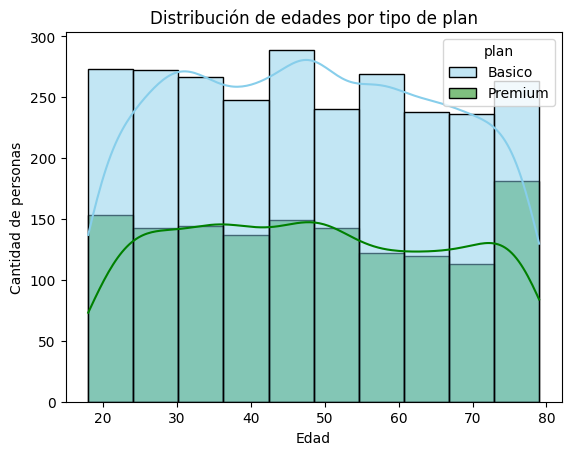

In [30]:
# Histograma para visualizar la edad (age)
#sns.histplot(...)
sns.histplot(data=user_profile, x='age', hue='plan', bins=10, 
             palette=['skyblue','green'], kde=True)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de edades por tipo de plan')

plt.show()

💡Insights: 
- Distribución total mayormente entre 40 y 50 años
- Entre 70 y 80 años la cantidad de personas con plan Premium aumenta, mientras que la cantidad de personas con plan Básico disminuye

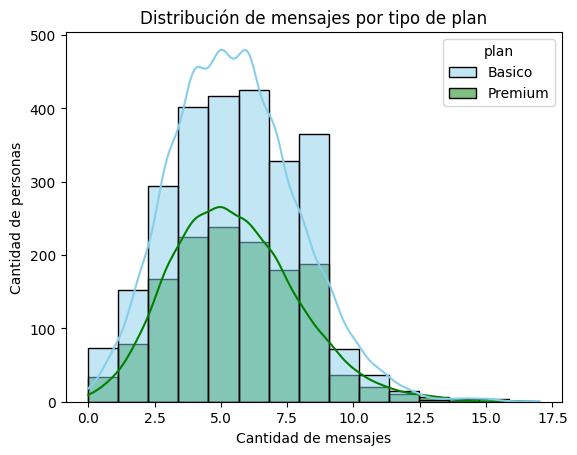

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', bins=15, 
             palette=['skyblue','green'], kde=True)
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de mensajes por tipo de plan')

plt.show()

💡Insights: 
- Patrón general de uso: La mayoría de usuarios envían entre 3-7 mensajes
- Diferencia por tipo de plan: Los usuarios Premium tienden a enviar más mensajes que los usuarios Basic

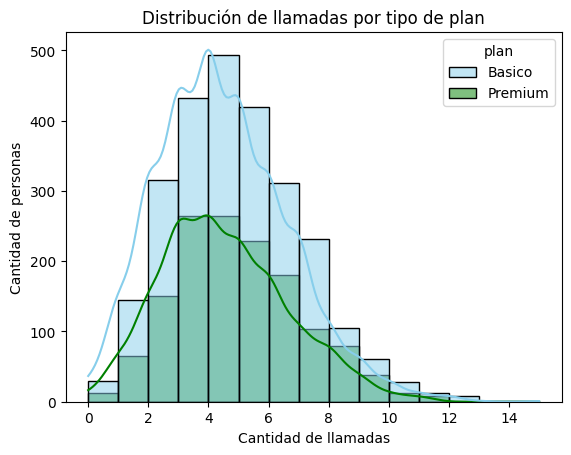

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', bins=15, 
             palette=['skyblue','green'], kde=True)
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de llamadas por tipo de plan')

plt.show()

💡Insights: 
- Patrón general de uso: La mayoría de usuarios hacen entre 3-6 llamadas
- Diferencia por tipo de plan: Los usuarios Premium tienden a hacer más llamadas que los usuarios Basic

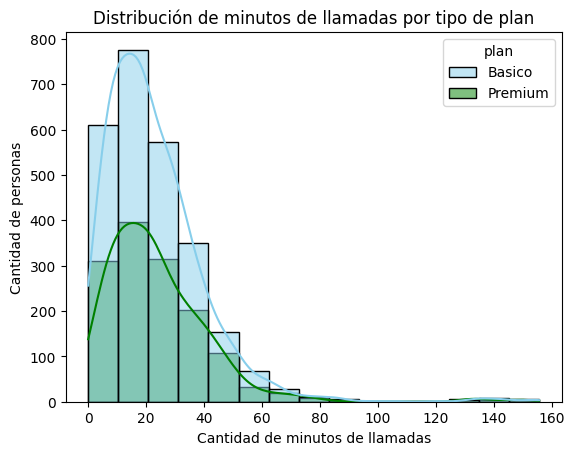

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', bins=15, 
             palette=['skyblue','green'], kde=True)
plt.xlabel('Cantidad de minutos de llamadas')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de minutos de llamadas por tipo de plan')

plt.show()

💡Insights: 
- Patrón general de uso: La mayoría de usuarios usan entre 1-10 minutos de llamadas
- Diferencia por tipo de plan: Los usuarios Premium tienden a usar más minutos de llamadas que los usuarios Basic

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

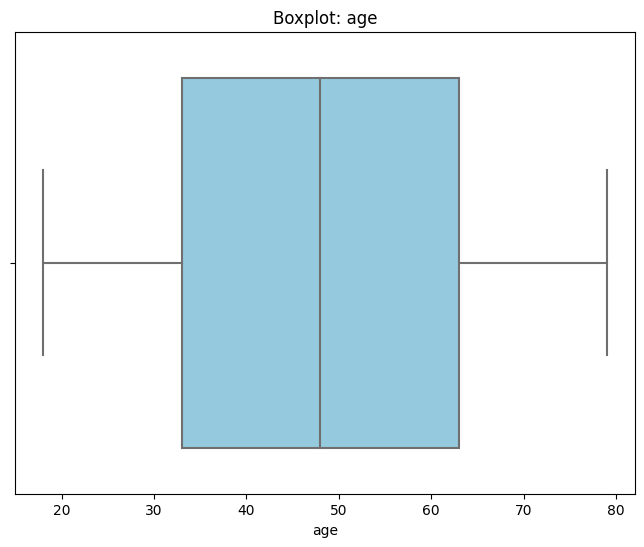

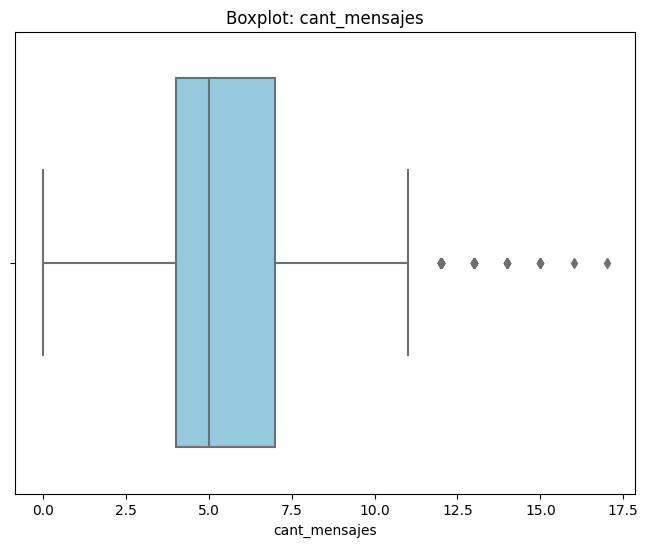

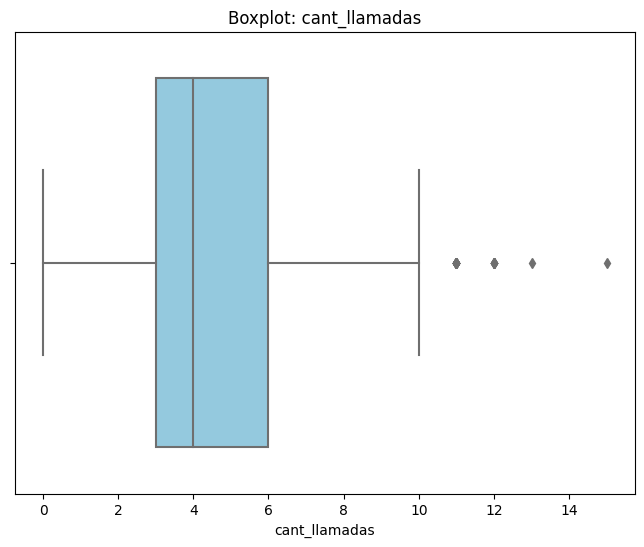

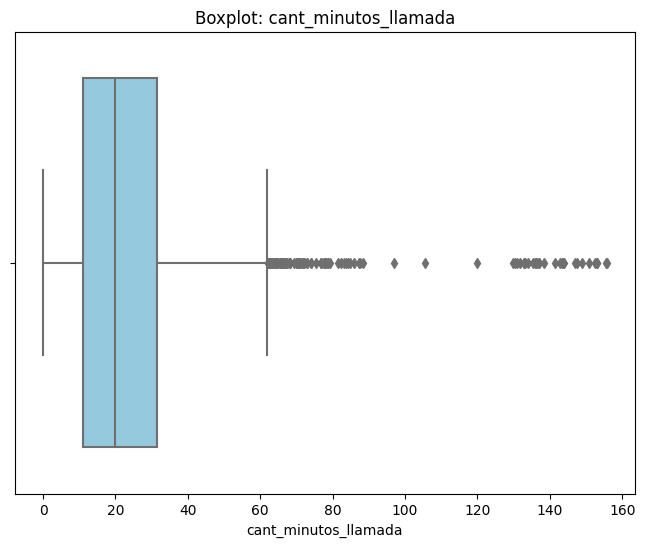

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot: {col}')
    sns.boxplot(data=user_profile, x=col, hue='plan', palette=['skyblue','green'])
    plt.show()

💡Insights: 
- Age: No presenta outliers
- cant_mensajes: Presenta outliers
- cant_llamadas: Presenta outliers
- cant_minutos_llamada: Presenta outliers

In [35]:
# Calcular límites con el método IQR
#columnas_limites = ['...']
columnas_limites = ['age','cant_mensajes','cant_llamadas','cant_minutos_llamada']
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = user_profile[(user_profile[col] < limite_inferior) | 
                           (user_profile[col] > limite_superior)]
    
    print(f"\n--- {col.upper()} ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")
    print(f"Cantidad de outliers: {len(outliers)}")


--- AGE ---
Q1: 33.00
Q3: 63.00
IQR: 30.00
Límite inferior: -12.00
Límite superior: 108.00
Cantidad de outliers: 0

--- CANT_MENSAJES ---
Q1: 4.00
Q3: 7.00
IQR: 3.00
Límite inferior: -0.50
Límite superior: 11.50
Cantidad de outliers: 46

--- CANT_LLAMADAS ---
Q1: 3.00
Q3: 6.00
IQR: 3.00
Límite inferior: -1.50
Límite superior: 10.50
Cantidad de outliers: 30

--- CANT_MINUTOS_LLAMADA ---
Q1: 11.12
Q3: 31.41
IQR: 20.30
Límite inferior: -19.32
Límite superior: 61.86
Cantidad de outliers: 109


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- Para los outliers de cant_mensajes, cant_llamadas y cant_minutos_llamada es recomendable mantener los registros, ya que pueden ser oportunidades comerciales:

Para usuarios con alto consumo (outliers superiores):

- Candidatos para upgrade a planes Premium
- Ofertas de paquetes adicionales
- Programas de fidelización VIP

Para usuarios con bajo consumo (outliers inferiores):

- Migración a planes más económicos
- Ofertas para incentivar mayor uso
- Retención proactiva

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [39]:
# Crear columna grupo_uso
def classify_group(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']

    # 1. Manejo de valores nulos/faltantes
    if pd.isna(llamadas) or pd.isna(mensajes):
        return "Error en Datos"

    # --- 2. Segmentación de Bajo uso ---
    if llamadas < 5 and mensajes < 5:
        return "Bajo uso"
        
    # --- 3. Segmentación Uso medio ---
    elif llamadas < 10 and mensajes < 10:
        return "Uso medio"

    # --- 3. Segmentación Alto uso ---
    else: 
        return "Alto uso"

# aplicar función y verificar cambios
user_profile['grupo_uso'] = user_profile.apply(classify_group, axis=1)

In [40]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,3.0,7.0,23.70,258.0,Uso medio
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,10.0,5.0,33.18,226.0,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2.0,5.0,10.74,225.0,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,3.0,11.0,8.99,530.0,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,3.0,4.0,8.01,229.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [42]:
# Crear columna grupo_edad
def classify_age(row):
    age = row['age']

    # 1. Manejo de valores nulos/faltantes
    if pd.isna(age):
        return "Error en Datos"

    # --- 2. Segmentación de Joven ---
    if age < 30:
        return "Joven"
        
    # --- 3. Segmentación Adulto ---
    elif age < 60:
        return "Adulto"

    # --- 3. Segmentación Adulto Mayor ---
    else: 
        return "Adulto Mayor"

# aplicar función y verificar cambios
user_profile['grupo_edad'] = user_profile.apply(classify_age, axis=1)

In [43]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_llamadas,cant_mensajes,cant_minutos_llamada,cant_caracteres_mensaje,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,3.0,7.0,23.70,258.0,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,10.0,5.0,33.18,226.0,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2.0,5.0,10.74,225.0,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,3.0,11.0,8.99,530.0,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,3.0,4.0,8.01,229.0,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

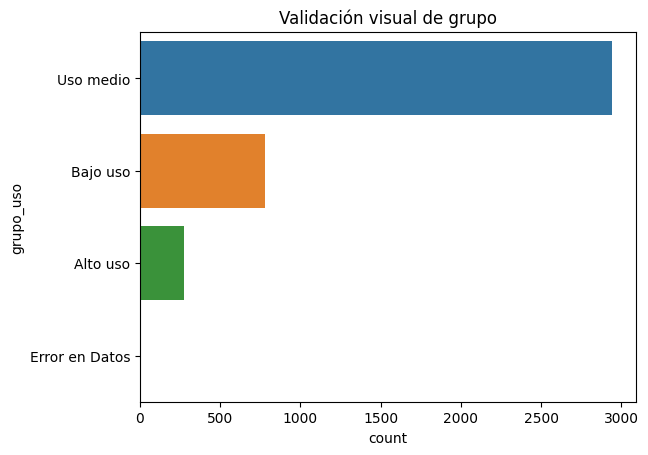

In [44]:
# Visualización de los segmentos por uso
#sns.countplot(...)

sns.countplot(data=user_profile, y='grupo_uso', order=user_profile['grupo_uso'].value_counts().index)
plt.title('Validación visual de grupo')

plt.show()

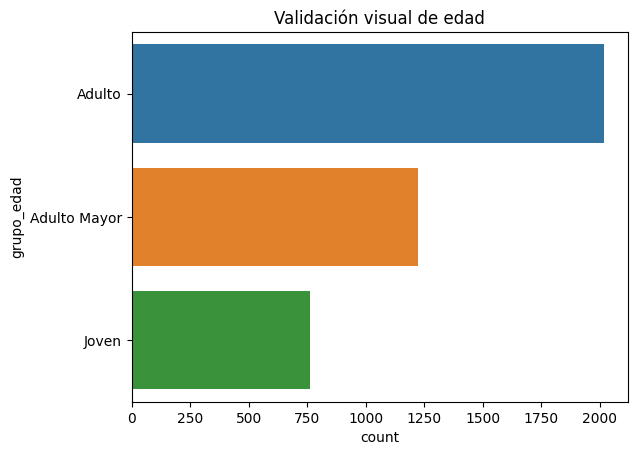

grupo_uso,Alto uso,Bajo uso,Error en Datos,Uso medio
grupo_edad,,,,
Adulto,153,364,1,1500
Adulto Mayor,74,257,0,891
Joven,51,157,0,552


In [47]:

# Visualización de los segmentos por edad
sns.countplot(data=user_profile, y='grupo_edad', order=user_profile['grupo_edad'].value_counts().index)
plt.title('Validación visual de edad')
plt.show()

# visualización cruzada para ver la relación entre grupo_edad y grupo_uso
pd.crosstab(user_profile['grupo_edad'], user_profile['grupo_uso'])


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


Age --> 55 sentinels encontrados

City --> 11% del total de registros son sentinels

Reg_Date --> 40 fechas fuera de rango encontradas


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?

El Uso Medio es lo que más se tiene en todos los grupos de edad

Los Adultos es el grupo que mayor uso en general tienen, seguido por los Adultos Mayores y al final los Jovenes


- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?

Los Adultos con Uso medio, ya que son quienes tiene el mayor volumen de uso


- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

Clientes con llamadas y mensajes mayores a lo normal. Implica que pueden ser opciones de negocio para:


Candidatos para upgrade a planes Premium

Ofertas de paquetes adicionales

Programas de fidelización VIP


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

Enfocarse principalmente en los Adultos y Adultos Mayores, quienes son los que mayor uso generan

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Age --> 55 sentinels encontrados, se reemplaza el sentinel -999 con la mediana
- City --> 11% del total de registros son sentinels, se reemplaza el sentinel "?" por valores nulos (pd.NA)
- Reg_Date --> 40 fechas fuera de rango encontradas, se marcan como nulas (pd.NA)


🔍 **Segmentos por Edad**
- Adulto - mayor cantidad de usuarios
- Adulto Mayor - cantidad media/alta de usuarios
- Joven - Baja cantidad de usuarios 


📊 **Segmentos por Nivel de Uso**
- Bajo Uso - Poca cantidad de usuarios
- Medio Uso - Mayor cantidad de usuarios
- Alto Uso - Muy poca cantidad de usuarios


➡️ Esto sugiere que los Adultos con Nivel de Uso Medio es el segmento con mayor relevancia para la empresa


💡 **Recomendaciones**
- Enfocarse en los Adultos con Uso Medio para temas de mercadotecnia
- Generar ofertas para el Uso Medio y Alto

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`

https://github.com/armandochapa/telecom-analysis